Import necessary packages: Numpy, Pandas, matplotlib

In [187]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Mount your google drive (if you have a google account) or upload files (go on the file icon on the left -> right click). Copy path of zip.train and zip.test and load them as numpy arrays using the following code (insert the path as string).

In [188]:
path_to_train = './Data/zip.train'
path_to_test = './Data/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

# We only want to classify two different digits. Note the only difference is
# that we don't load as many ones as we load zeros.

X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1][:30]
X_train = np.vstack((X_train_0, X_train_1))

y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1][:30]
y_train = np.hstack((y_train_0, y_train_1))

X_test_0 = X_test[y_test == 0]
X_test_1 = X_test[y_test == 1][:12]
X_test = np.vstack((X_test_0, X_test_1))

y_test_0 = y_test[y_test == 0]
y_test_1 = y_test[y_test == 1][:12]
y_test = np.hstack((y_test_0, y_test_1))
print(X_test.shape)
print(y_test.shape)

print(X_train.shape)
print(y_train.shape)

(371, 256)
(371,)
(1224, 256)
(1224,)


In [189]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 1-sample_digits[i].reshape((16, 16)) 
        plt.imshow(img, cmap='gray')
        plt.axis('off')


(90,)


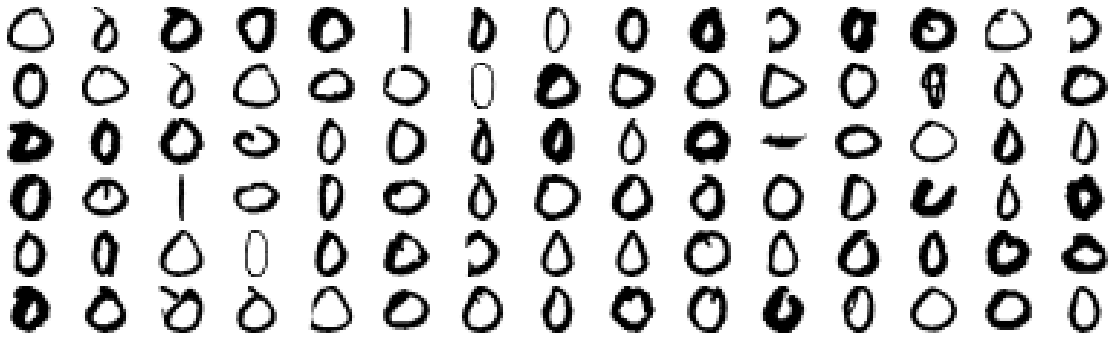

In [190]:
show_numbers(X_test)

Choose one of the classifiers you implemented and use it on the following task: Take a look at the provided notebook. It loads the ZIP-Code’s zeros and ones, but now there are manymore zeros than there are ones. We are going to believe that these digits represent geneticdata. Actually, we are virologists trying to develop a test to determine which of the data belongs to infected patients (the ones) and which do not (the zeros). Train/apply your model on the data and do the tasks of the exercise.

#  For this task we decided to use KNN to train the data 

In [191]:
class KNearestNeighbors():
    '''
    Think about defining more functions that will help you building this algorithm.
    Optimally, one that takes in k and a test image as a parameter.
    '''
    def predict(self, X_test, k):       # As suggested, a function that takes in k and a test image as a parameter.
        predict_results = []
        for i in X_test:
            squared_distances = self.squared_euclidean_distance(self.X, i)
            indices = np.argpartition(squared_distances, k)[:k]   # get the indices of k values with smaller distances
            answer_indices = (self.y[indices])       # get the value of the label corresponding to index
            #print(answer_indices)
            list = answer_indices.tolist()           # turn numpy array into a normal list to use count
            majority = max(list, key=list.count)     # get the value with the most occurrences
            #print(majority)
            predict_results += [majority]            # add it to a result list
        return(predict_results)
                    
    def fit(self, x, y):     #fit X_train, y_train together
        self.X = x
        self.y = y
            
    def squared_euclidean_distance(self, x_1, x_2):
        return np.sum((x_1-x_2)**2, axis = 1)

    def correctness(self, right_answer, predict_result):
        return np.mean(right_answer == predict_result)
    
    def variance(self, prediction, y_new_test):
        return np.var(y_new_test != prediction)
    
kNN = KNearestNeighbors()
squared_distances = kNN.squared_euclidean_distance(X_train, X_test[0])

In [192]:
kNN.fit(X_train, y_train)

prediction1 = kNN.predict(X_test, 1)     # k=1
prediction2 = kNN.predict(X_test, 2)
prediction3 = kNN.predict(X_test, 3)
prediction4 = kNN.predict(X_test, 4)
prediction5 = kNN.predict(X_test, 5)
prediction6 = kNN.predict(X_test, 6)

#print(prediction)

print(kNN.correctness(y_test, prediction1))
print(kNN.correctness(y_test, prediction2))
print(kNN.correctness(y_test, prediction3))
print(kNN.correctness(y_test, prediction4))
print(kNN.correctness(y_test, prediction5))
print(kNN.correctness(y_test, prediction6))


0.9973045822102425
0.9973045822102425
0.9973045822102425
0.9973045822102425
0.9973045822102425
0.9973045822102425


(90,)


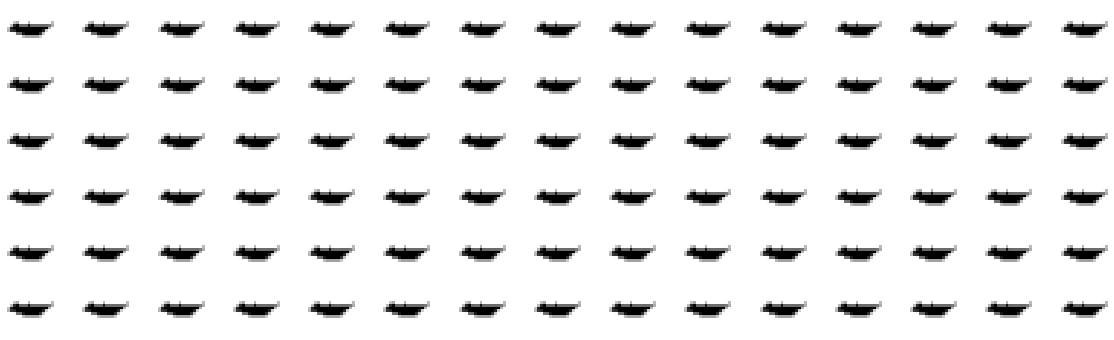

In [193]:
wrong = X_test[(prediction1 != y_test)]   # numbers that are classified incorrectly
show_numbers(wrong)

In [194]:
import random

def implemented_shuffle(X_total, y_total):
    n = X_total.shape[0]
    for i in range(0, n):
        j = random.randint(i, n - 1)
        X_total[j], X_total[i] = X_total[i], X_total[j]
        y_total[j], y_total[i] = y_total[i], y_total[j]
    return X_total, y_total

# Get all datas(test + train)
X_total = np.vstack((X_test, X_train))
y_total = np.hstack((y_test, y_train))

# shuffle all data
# np.random.shuffle(X_total)
# np.random.shuffle(y_total)

X_total, y_total = implemented_shuffle(X_total, y_total)
print(X_total.shape)
print(y_total.shape)

print(1595/5)

(1595, 256)
(1595,)
319.0


In [195]:
# Split all data into 5 portions
X_1 = X_total[:319]
X_2 = X_total[319:319*2]
X_3 = X_total[319*2:319*3]
X_4 = X_total[319*3:319*4]
X_5 = X_total[319*4:319*5]

y_1 = y_total[:319]
y_2 = y_total[319:319*2]
y_3 = y_total[319*2:319*3]
y_4 = y_total[319*3:319*4]
y_5 = y_total[319*4:319*5]

In [196]:
def confusion_matrix(prediction, y_test):
    positive_true = 0
    negative_false = 0
    positive_false = 0
    negative_true = 0 
    
    for i in range(y_test.shape[0]):
        if(prediction[i] == y_test[i]):
            if(y_test[i] == 1):
                negative_true += 1
            else:
                positive_true += 1
        else:
            if(y_test[i] == 1):
                negative_false += 1
            else:
                positive_false += 1
    return np.array([[positive_true, negative_false], [positive_false, negative_true]])

# Task 1:
- __Mean(Bias)__: Average error of the model
- __Variance__: Error spread around the mean

# Task 2: 

## yi = 1 p(yi) = 1 -->  negative_true
## yi = 0 p(yi) = 0 -->  positive_true

## Task 2.a

In [197]:
global all_matrics
all_matrics = []

# get the training data set without testing data
def get_train(num, temp):
    X_new_train = None
    counter = 0
    for i in range(5):
        if type(X_new_train) is not np.ndarray:
            if(i != num - 1):
                X_new_train = temp[i]
        else:
            if(i != num - 1):
                X_new_train = np.concatenate((X_new_train, temp[i]))
    return X_new_train

def cross_validation():
    global all_matrics
    
    random_number = random.randint(1, 5)

    # determine the test data set with help of random variable
    X_new_test = None
    y_new_test = None
    if(random_number == 1):
        X_new_test = X_1
        y_new_test = y_1
    elif(random_number == 2):
        X_new_test = X_2
        y_new_test = y_2
    elif(random_number == 3):
        X_new_test = X_3
        y_new_test = y_3
    elif(random_number == 4):
        X_new_test = X_4
        y_new_test = y_4
    elif(random_number == 5):
        X_new_test = X_5
        y_new_test = y_5

    temp_x = [X_1, X_2, X_3, X_4, X_5]
    temp_y = [y_1, y_2, y_3, y_4, y_5]

    X_new_train = get_train(random_number, temp_x)
    y_new_train = get_train(random_number, temp_y)

    kNN.fit(X_new_train, y_new_train)
    prediction = kNN.predict(X_new_test, 2) 
    
    print("confusion_matrix: ")
    matrix = confusion_matrix(prediction, y_new_test)
    all_matrics.append(matrix)
    print(matrix)
    print("Bias: " + str(round(1 - kNN.correctness(y_new_test, prediction),6)))
    print("Variance: " + str(round(kNN.variance(prediction, y_new_test),6)))
    print()

# 5-fold cross-validation
for i in range(5):
    cross_validation()

confusion_matrix: 
[[309   7]
 [  2   1]]
Bias: 0.028213
Variance: 0.027417

confusion_matrix: 
[[309   7]
 [  2   1]]
Bias: 0.028213
Variance: 0.027417

confusion_matrix: 
[[312   4]
 [  2   1]]
Bias: 0.018809
Variance: 0.018455

confusion_matrix: 
[[312   4]
 [  2   1]]
Bias: 0.018809
Variance: 0.018455

confusion_matrix: 
[[312   4]
 [  2   1]]
Bias: 0.018809
Variance: 0.018455



In [198]:
target_matrix = np.zeros((2,2), dtype = np.int64)
for i in all_matrics:
    target_matrix += i
print(target_matrix)

[[1554   26]
 [  10    5]]


## Task b

In [199]:
print("precision: ", end="")
precision = target_matrix[0][0] / (target_matrix[0][1] + target_matrix[0][0])
print(precision)

print("recall: ", end="")
recall = target_matrix[0][0] / (target_matrix[0][0] + target_matrix[1][0])
print(recall)

print("f1: ", end="")
f1 = 2 / (1 / precision + 1 / recall)
print(f1)

precision: 0.9835443037974684
recall: 0.9936061381074168
f1: 0.9885496183206107


 Accuracy is the ratio of #(correct predicted data) and #(all data). It's kind of like precision. 
 
 f1 is the average of precision and recall. 

## Task c

In [200]:
print("Pr(test is positive, result positive): ", end="")
print(str(round(target_matrix[1][1] / X_total.shape[0] * 100, 100)) + "%")

Pr(test is positive, result positive): 0.3134796238244514%
